In [122]:
import numpy
import pandas
import matplotlib.pyplot
import matplotlib.style
import copy
matplotlib.style.use('ggplot')

%matplotlib inline

In [123]:
titanic_data =  pandas.read_csv('Titanic.csv', index_col=None)

How many passengers we know?

In [124]:
passengers_num = titanic_data.shape[0] #rows in Titanic.csv table
print(passengers_num)

1313


How many of them survived?

In [125]:
survived = titanic_data[titanic_data.loc[:, 'Survived'] == True] #rows from Titanic.csv, column 'Survived'
total_survived_num = survived.shape[0] #number of rows with 1
survived_percent = total_survived_num / (passengers_num / 100)
print('{} out of {} (~{:.5f} %)'.format(total_survived_num, passengers_num, survived_percent))

450 out of 1313 (~34.27266 %)


How many men survived? How many women?

In [126]:
men = titanic_data[titanic_data.loc[:, 'Sex'] == 'male']
men_num = men.shape[0]
women_num = passengers_num - men_num

men_survived = men[men.loc[:, 'Survived'] == True]
men_survived_num = men_survived.shape[0]
women_survived_num = total_survived_num - men_survived_num

men_survived_percent = men_survived_num / (men_num / 100)
women_survived_percent = women_survived_num / (women_num / 100)

print('Men survived: {} out of {} (~{:.5f} %)'.format(men_survived_num, men_num, men_survived_percent))
print('Women survived: {} out of {} (~{:.5f} %)'.format(women_survived_num, women_num, women_survived_percent))

Men survived: 142 out of 851 (~16.68625 %)
Women survived: 308 out of 462 (~66.66667 %)


Stats for each class:

In [127]:
classes = titanic_data.PClass.unique()
print(classes)
titanic_data[titanic_data.loc[:, 'PClass'] == '*']

['1st' '2nd' '*' '3rd']


,Unnamed: 0,Name,PClass,Age,Sex,Survived,SexCode
456,457,Jacobsohn Mr Samuel,*,NaN,male,0,0


Now it seems that "*" class is only one person (that did not survive), so we should probably filter it out.

In [128]:
classes = numpy.delete(classes, numpy.where(classes=='*'))
print(classes)

['1st' '2nd' '3rd']


In [129]:
cols = ['class', 'survived', 'deceased', 'total', 'percent of class', 'percent of all survivors']
classes_data = pandas.DataFrame()

for cls in classes:
    total = titanic_data[titanic_data.loc[:, 'PClass'] == cls]
    total_num = total.shape[0]
    
    survived = total[total.loc[:, 'Survived'] == True]
    survived_num = survived.shape[0]
    deceased_num = total_num - survived_num
    
    percent_class = survived_num / (total_num / 100)
    percent_total = survived_num / (total_survived_num / 100)
    row = pandas.DataFrame([{'class' : cls, 'survived' : survived_num, 
                         'deceased' : deceased_num, 'total' : total_num, 
                         'percent of class' : percent_class,
                         'percent of all survivors' : percent_total }], columns=cols)
    classes_data = classes_data.append(row, ignore_index=True)

classes_data

,class,survived,deceased,total,percent of class,percent of all survivors
0,1st,193,129,322,59.937888,42.888889
1,2nd,119,160,279,42.652330,26.444444
2,3rd,138,573,711,19.409283,30.666667


Survival rate based on age:

In [130]:
max_age = titanic_data.loc[:, 'Age'].max()
survived_ages = pandas.DataFrame(columns=['decade', 'survived', 'total', 'percent of all survivors'])
for decade in range(0,int(max_age),10):
    total_decade = titanic_data[(titanic_data.loc[:, 'Age'] >= decade) &
                                   (titanic_data.loc[:, 'Age'] <  decade + 10)]
    
    survived_decade = total_decade[total_decade.loc[:, 'Survived'] == True]
    
    
    percent = survived_decade.shape[0] / (total_survived_num / 100)
    row = pandas.DataFrame([{'decade' : '{}-{}'.format(decade, decade + 9), 
                             'survived' : survived_decade.shape[0], 
                             'total' : total_decade.shape[0],
                             'percent of all survivors' : percent}])
    
    survived_ages = survived_ages.append(row, ignore_index=True)

total_na = titanic_data[titanic_data.loc[:, 'Age'].isnull()]
survived_na = total_na[total_na.loc[:, 'Survived'] == True]
percent_na = survived_na.shape[0] / (total_survived_num / 100)

row = pandas.DataFrame([{'decade' : 'No age data', 
                         'survived' : survived_na.shape[0], 
                         'total' : total_na.shape[0],
                         'percent of all survivors' : percent_na}])

survived_ages = survived_ages.append(row, ignore_index=True)

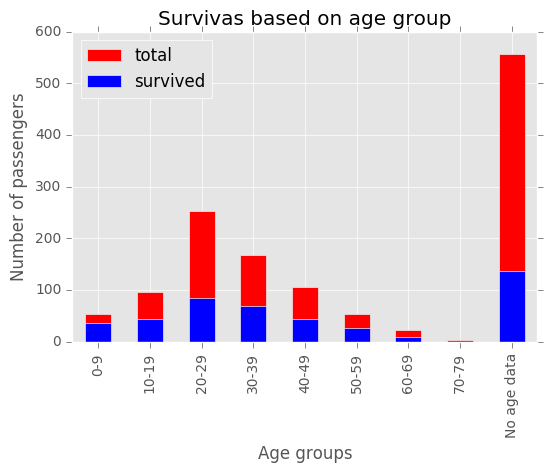

In [131]:
survived_ages['total'].plot.bar(color='r')
survived_ages['survived'].plot.bar(color='b')

matplotlib.pyplot.legend(loc='upper left')
matplotlib.pyplot.title('Survivas based on age group')
matplotlib.pyplot.xlabel('Age groups')
matplotlib.pyplot.ylabel('Number of passengers')
matplotlib.pyplot.xticks(list(range(len(survived_ages))), survived_ages['decade'].values, rotation = 'vertical')
matplotlib.pyplot.show()

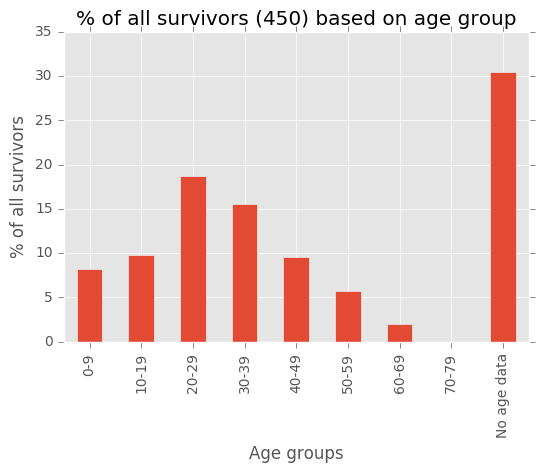

In [132]:
survived_ages['percent of all survivors'].plot.bar()

matplotlib.pyplot.title('% of all survivors ({}) based on age group'.format(total_survived_num))
matplotlib.pyplot.xlabel('Age groups')
matplotlib.pyplot.ylabel('% of all survivors')
matplotlib.pyplot.xticks(list(range(len(survived_ages))), survived_ages['decade'].values, rotation = 'vertical')
matplotlib.pyplot.show()

Relationship between passenger's age and class:

In [133]:
classes_nums = dict((elem, 0) for elem in classes)
classes_percent = copy.deepcopy(classes_nums)

age_class = pandas.DataFrame(columns=classes_nums)
age_class_percent = pandas.DataFrame(columns=classes_percent)

for decade in range(0,int(max_age),10):
    
    total_decade = titanic_data[(titanic_data.loc[:, 'Age'] >= decade) &
                                (titanic_data.loc[:, 'Age'] <  decade + 10)]
    
    classes_nums['decade'] = '{}-{}'.format(decade, decade + 9)
    classes_percent['decade'] = '{}-{}'.format(decade, decade + 9)
    for cls in classes:
        total_cls = total_decade[total_decade.loc[:, 'PClass'] == cls]
        classes_nums[cls] = total_cls.shape[0]
        classes_percent[cls] = total_cls.shape[0] / (total_decade.shape[0] / 100)
        
    
    age_class = age_class.append([classes_nums], ignore_index=True)
    age_class_percent = age_class_percent.append([classes_percent], ignore_index=True)

Number of passengers in each class by age:

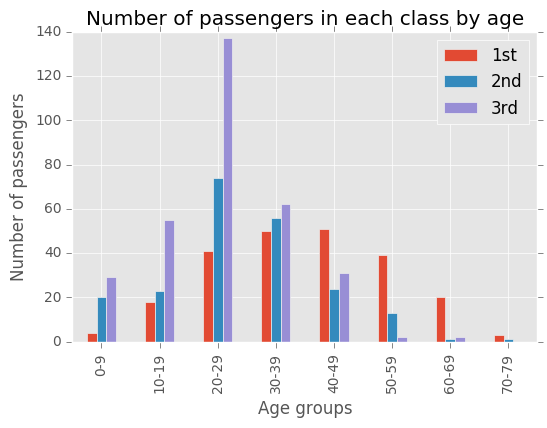

In [140]:
age_class.plot.bar()
matplotlib.pyplot.xticks(list(range(len(age_class))), age_class['decade'].values, rotation = 'vertical')
matplotlib.pyplot.title('Number of passengers in each class by age')
matplotlib.pyplot.xlabel('Age groups')
matplotlib.pyplot.ylabel('Number of passengers')
matplotlib.pyplot.show()

Distribution of passengers in each age group between classes (meaning in class *C* was *y %* of passengers from age group *x*):

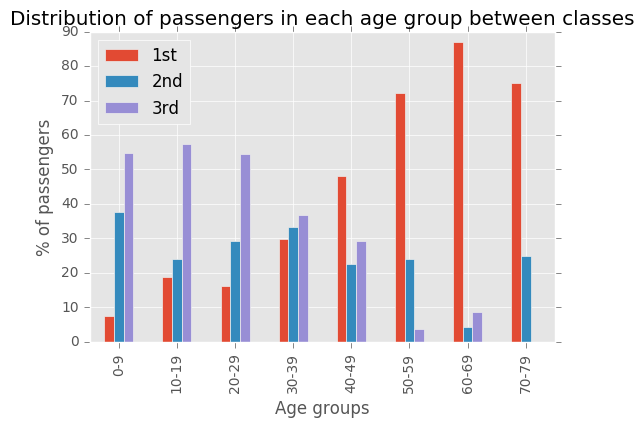

In [135]:
age_class_percent.plot.bar()
matplotlib.pyplot.xticks(list(range(len(age_class_percent))), age_class_percent['decade'].values, rotation = 'vertical')
matplotlib.pyplot.title('Distribution of passengers in each age group between classes')
matplotlib.pyplot.xlabel('Age groups')
matplotlib.pyplot.ylabel('% of passengers')
matplotlib.pyplot.show()

If we want to plot data for passangers without known age:

In [136]:
classes_nums['decade'] = 'No age data'
classes_percent['decade'] = 'No age data'
for cls in classes:
    total_cls = total_na[total_na.loc[:, 'PClass'] == cls]
    classes_nums[cls] = total_cls.shape[0]
    classes_percent[cls] = total_cls.shape[0] / (total_na.shape[0] / 100)
    
age_class_na = age_class.append([classes_nums], ignore_index=True)
age_class_percent_na = age_class_percent.append([classes_percent], ignore_index=True)

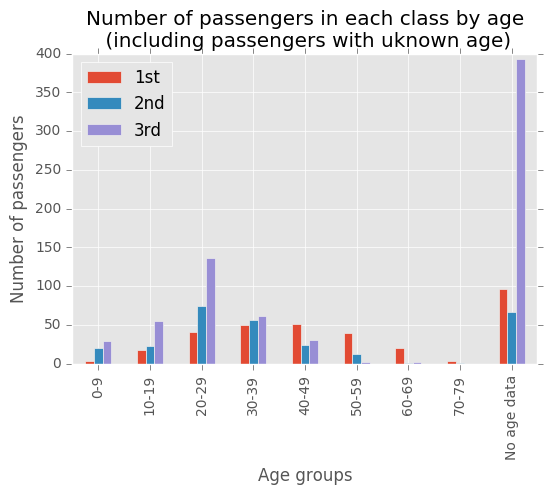

In [137]:
age_class_na.plot.bar()
matplotlib.pyplot.xticks(list(range(len(age_class_na))), age_class_na['decade'].values, rotation = 'vertical')
matplotlib.pyplot.title('Number of passengers in each class by age\n (including passengers with uknown age)')
matplotlib.pyplot.xlabel('Age groups')
matplotlib.pyplot.ylabel('Number of passengers')
matplotlib.pyplot.show()

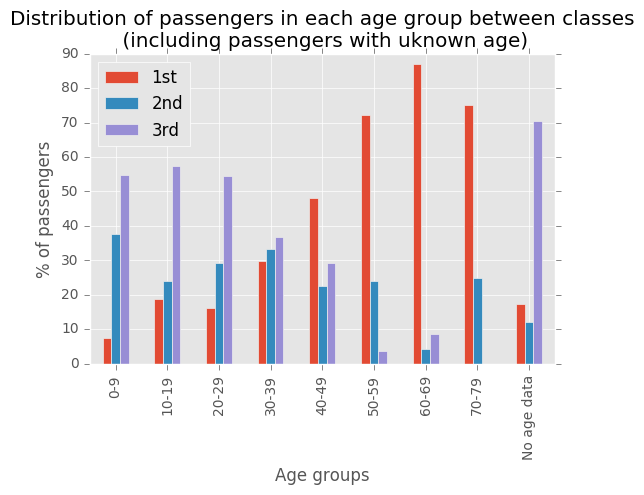

In [138]:
age_class_percent_na.plot.bar()
matplotlib.pyplot.xticks(list(range(len(age_class_percent_na))), age_class_percent_na['decade'].values, rotation = 'vertical')
matplotlib.pyplot.title('Distribution of passengers in each age group between classes\n (including passengers with uknown age)')
matplotlib.pyplot.xlabel('Age groups')
matplotlib.pyplot.ylabel('% of passengers')
matplotlib.pyplot.show()